# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import csv


from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:

query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_data = []
for city in cities:
    try: 
        response = requests.get(query_url + '&q=' + city).json()
        lat = response['coord']['lat']
        long = response['coord']['lon']
        temp = response['main']['temp_max'] 
        humidity = response['main']['humidity']
        wind = response['wind']['speed']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        
        print(f'The cities information received is: {city}')
        print(f'The tempriture information received is: {temp}')
        city_data.append({'city': city,
                          'lat': lat,
                          'long': long,
                          'temp': temp,
                          'humidity': humidity,
                          'wind': wind,
                          'cloudiness': cloudiness,
                          'country': country,
                          'date': date
                         })
    except:
        print('city not found')
        pass
city_data
    
    
    

The cities information received is: saint george
The tempriture information received is: 66
The cities information received is: puerto ayora
The tempriture information received is: 84.2
The cities information received is: port alfred
The tempriture information received is: 64.76
The cities information received is: pevek
The tempriture information received is: 6.08
city not found
The cities information received is: leopold
The tempriture information received is: 57
The cities information received is: gawler
The tempriture information received is: 63
The cities information received is: kapaa
The tempriture information received is: 80.6
The cities information received is: jamestown
The tempriture information received is: 39.99
The cities information received is: tuatapere
The tempriture information received is: 57
The cities information received is: ushuaia
The tempriture information received is: 44.6
The cities information received is: coracora
The tempriture information received is: 51.

The cities information received is: namibe
The tempriture information received is: 75.92
The cities information received is: bluff
The tempriture information received is: 57
city not found
The cities information received is: mahebourg
The tempriture information received is: 79
The cities information received is: majene
The tempriture information received is: 81.12
The cities information received is: carnarvon
The tempriture information received is: 73.4
city not found
The cities information received is: ribeira grande
The tempriture information received is: 61.83
The cities information received is: longyearbyen
The tempriture information received is: -5.8
The cities information received is: arraial do cabo
The tempriture information received is: 71.6
The cities information received is: great bend
The tempriture information received is: 69.8
The cities information received is: dasoguz
The tempriture information received is: 46.4
The cities information received is: chumikan
The tempritur

The cities information received is: geraldton
The tempriture information received is: 64.4
The cities information received is: columbus
The tempriture information received is: 45
The cities information received is: emerald
The tempriture information received is: 75.2
The cities information received is: terney
The tempriture information received is: 32.5
city not found
city not found
city not found
The cities information received is: omsukchan
The tempriture information received is: 13.41
The cities information received is: ostrovnoy
The tempriture information received is: 14.34
The cities information received is: koygorodok
The tempriture information received is: 27.7
The cities information received is: den chai
The tempriture information received is: 81
The cities information received is: lae
The tempriture information received is: 86.67
The cities information received is: roald
The tempriture information received is: 39.99
The cities information received is: hofn
The tempriture infor

The cities information received is: staryy nadym
The tempriture information received is: 33.24
The cities information received is: nouadhibou
The tempriture information received is: 71.6
The cities information received is: bayonet point
The tempriture information received is: 84.2
The cities information received is: ugoofaaru
The tempriture information received is: 83.64
The cities information received is: coihaique
The tempriture information received is: 50
The cities information received is: olafsvik
The tempriture information received is: 36.52
The cities information received is: obigarm
The tempriture information received is: 46.36
The cities information received is: phalodi
The tempriture information received is: 80.53
The cities information received is: nuuk
The tempriture information received is: 33.8
The cities information received is: aswan
The tempriture information received is: 62.01
The cities information received is: leningradskiy
The tempriture information received is: 10

The cities information received is: wilmington
The tempriture information received is: 63
The cities information received is: cuamba
The tempriture information received is: 64.58
The cities information received is: deputatskiy
The tempriture information received is: 21.94
The cities information received is: asau
The tempriture information received is: 45
The cities information received is: urdoma
The tempriture information received is: 23.2
The cities information received is: alofi
The tempriture information received is: 82.4
The cities information received is: xinmin
The tempriture information received is: 26.6
The cities information received is: sarangani
The tempriture information received is: 82.04
The cities information received is: ust-maya
The tempriture information received is: 36.3
city not found
The cities information received is: paamiut
The tempriture information received is: 36.55
The cities information received is: igarka
The tempriture information received is: 27.77
The 

The cities information received is: eirunepe
The tempriture information received is: 76.01
The cities information received is: necochea
The tempriture information received is: 57.99
The cities information received is: pinhao
The tempriture information received is: 49.95
The cities information received is: akhisar
The tempriture information received is: 48.22
The cities information received is: diego de almagro
The tempriture information received is: 58.08
The cities information received is: sibolga
The tempriture information received is: 76.82
The cities information received is: santa cruz de tenerife
The tempriture information received is: 72
city not found
The cities information received is: waingapu
The tempriture information received is: 81.93
The cities information received is: rafai
The tempriture information received is: 70.54
The cities information received is: neiafu
The tempriture information received is: 77.79
city not found
The cities information received is: soe
The tempri

The cities information received is: kangaatsiaq
The tempriture information received is: 32
The cities information received is: norman wells
The tempriture information received is: 30.2
The cities information received is: rundu
The tempriture information received is: 68
The cities information received is: keene
The tempriture information received is: 44.01
The cities information received is: kysyl-syr
The tempriture information received is: 28.42
The cities information received is: hami
The tempriture information received is: 53.37
The cities information received is: itarema
The tempriture information received is: 79.3
The cities information received is: leh
The tempriture information received is: 25.95
The cities information received is: chalmette
The tempriture information received is: 73.99
The cities information received is: boca do acre
The tempriture information received is: 75.87
The cities information received is: shanghai
The tempriture information received is: 60.01
The cities

[{'city': 'saint george',
  'lat': 37.1,
  'long': -113.58,
  'temp': 66,
  'humidity': 36,
  'wind': 21.92,
  'cloudiness': 1,
  'country': 'US',
  'date': 1586558716},
 {'city': 'puerto ayora',
  'lat': -0.74,
  'long': -90.35,
  'temp': 84.2,
  'humidity': 70,
  'wind': 6.93,
  'cloudiness': 40,
  'country': 'EC',
  'date': 1586558748},
 {'city': 'port alfred',
  'lat': -33.59,
  'long': 26.89,
  'temp': 64.76,
  'humidity': 86,
  'wind': 4.05,
  'cloudiness': 49,
  'country': 'ZA',
  'date': 1586558507},
 {'city': 'pevek',
  'lat': 69.7,
  'long': 170.31,
  'temp': 6.08,
  'humidity': 88,
  'wind': 22.95,
  'cloudiness': 100,
  'country': 'RU',
  'date': 1586558508},
 {'city': 'leopold',
  'lat': -38.18,
  'long': 144.47,
  'temp': 57,
  'humidity': 93,
  'wind': 18.34,
  'cloudiness': 90,
  'country': 'AU',
  'date': 1586558749},
 {'city': 'gawler',
  'lat': -34.6,
  'long': 138.73,
  'temp': 63,
  'humidity': 59,
  'wind': 17.22,
  'cloudiness': 40,
  'country': 'AU',
  'date': 1

In [5]:
city_df = pd.DataFrame(city_data)
city_df.head()

,city,lat,long,temp,humidity,wind,cloudiness,country,date
0,saint george,37.10,-113.58,66.00,36,21.92,1,US,1586558716
1,puerto ayora,-0.74,-90.35,84.20,70,6.93,40,EC,1586558748
2,port alfred,-33.59,26.89,64.76,86,4.05,49,ZA,1586558507
3,pevek,69.70,170.31,6.08,88,22.95,100,RU,1586558508
4,leopold,-38.18,144.47,57.00,93,18.34,90,AU,1586558749


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
city_df.to_csv('city_df.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

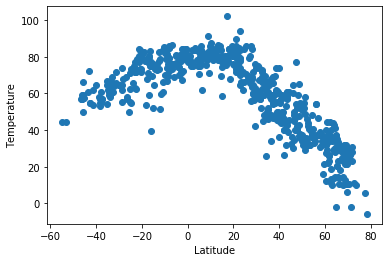

In [6]:

x_values = city_df['lat']
y_values = city_df['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [ ]:
#add a sentence or two explaining what the code is and analyzing.
from the scatter plot, it seems that as latitude increses, the temperature falls in away that the tempurature gets warmer towards the equator and then gets colder when the latutude get further away from the equator.


#### Latitude vs. Humidity Plot

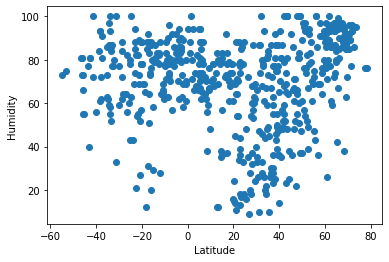

In [8]:
x_values = city_df['lat']
y_values = city_df['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [ ]:
It seems there is not a strong relationship between latitiude and humididty eventhough higher humidity rate can be observed when approching north hemisphere cities.

#### Latitude vs. Cloudiness Plot

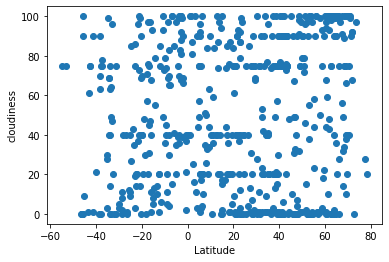

In [10]:
x_values = city_df['lat']
y_values = city_df['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.show()

In [ ]:
No strong relationship between getting far from the equater (0 deg latitude) and cloudiness can be observed. 

#### Latitude vs. Wind Speed Plot

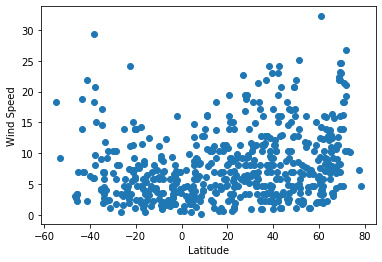

In [12]:
x_values = city_df['lat']
y_values = city_df['wind']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [ ]:
no strong relationship between latitude and wind speed. However, a cluster of cites close to north hemisphere with high speed wind around 20mph can be seen. 

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

def plotLinearRegression(x_values, y_values, xlabel, ylabel, labelpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,labelpos, fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

The r-squared is: 0.23169016241283596


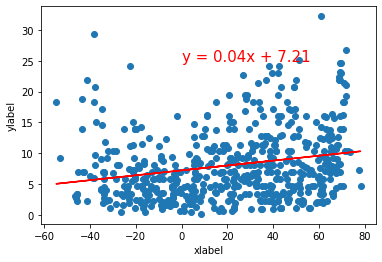

In [15]:
# Create Northern and Southern Hemisphere DataFrames
plotLinearRegression(x_values, y_values, 'xlabel', 'ylabel', (0, 25))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9072094312270721


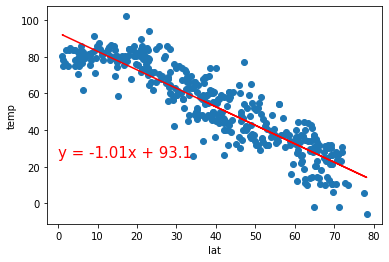

In [16]:
nothern = city_df.loc[city_df['lat']>= 0]
xlabel = "lat"
ylabel = "temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel, lblpos)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7015935481434357


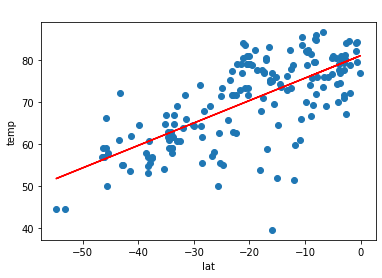

In [17]:
southern = city_df.loc[city_df['lat']< 0]
xlabel = "lat"
ylabel = "temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2964506736149899


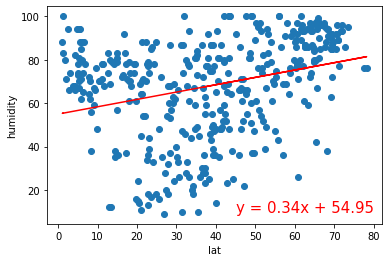

In [18]:
xlabel = "lat"
ylabel = "humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel,lblpos)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06702552802134658


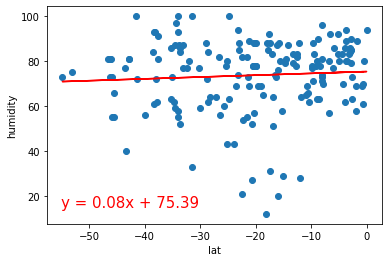

In [19]:
xlabel = "lat"
ylabel = "humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1879688191631842


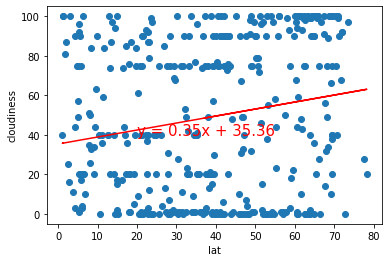

In [20]:
xlabel = "lat"
ylabel = "cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel,lblpos)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21557259697964742


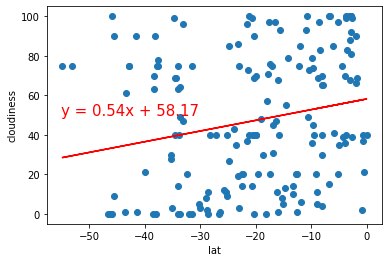

In [21]:
xlabel = "lat"
ylabel = "cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2475253485989652


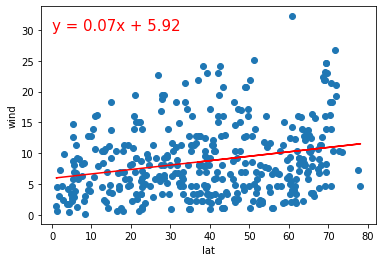

In [22]:
xlabel = "lat"
ylabel = "wind"
lblpos = (0,30)
plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel,lblpos)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2643816181683329


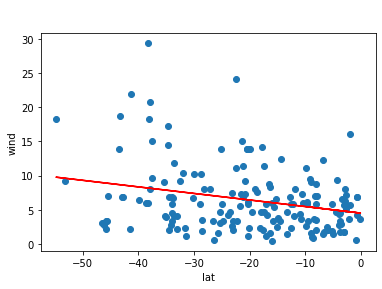

In [23]:
xlabel = "lat"
ylabel = "wind"
lblpos = (-25,33)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos)